## Hometask 

1) Classify the signs (fingers)  dataset 

2) Try to change the number of hidden layer 

3) Change the activation to tanh or sigmoid and see what happens

4) Change the dropout ratio and check the performance

In [1]:
!wget https://www.dropbox.com/s/f33ym46utiwdvy4/train_signs.h5?dl=0 -O data/train_signs.h5
!wget https://www.dropbox.com/s/1doojr76evzroet/test_signs.h5?dl=0 -O data/test_signs.h5


--2024-02-21 22:40:55--  https://www.dropbox.com/s/f33ym46utiwdvy4/train_signs.h5?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.66.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.66.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/f33ym46utiwdvy4/train_signs.h5 [following]
--2024-02-21 22:40:57--  https://www.dropbox.com/s/raw/f33ym46utiwdvy4/train_signs.h5
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc04a046fda8f325007d382ea24f.dl.dropboxusercontent.com/cd/0/inline/CNuJ3rmgyCa8RgyAkoOuD_GdGNxxELNZZ5MbDx46bbmlsvognBTEp-mtRBCWGBrRPgV5cyi_Io4h17_Pyyq-1DqWhtzOLsObU9GmlmSTFBvu7z2DXPNhYQT4Kc1WI6LXrYD53Bv7ZvdAYuEYCj_K6F6r/file# [following]
--2024-02-21 22:40:57--  https://uc04a046fda8f325007d382ea24f.dl.dropboxusercontent.com/cd/0/inline/CNuJ3rmgyCa8RgyAkoOuD_GdGNxxELNZZ5MbDx46bbmlsvognBTEp-mtRBCWGBrRPgV5cyi_Io4h17_Pyyq-1DqWhtzOLsObU9GmlmSTFBvu7z2DXPNhY

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

def load_dataset():
    fn =   'data/train_signs.h5'
    train_dataset = h5py.File(fn, "r")
    X_train = np.array(train_dataset["train_set_x"][:]) # your train set features
    Y_train = np.array(train_dataset["train_set_y"][:]) # your train set labels

    fn ='data/test_signs.h5'
    test_dataset =  h5py.File(fn, "r")
    X_test = np.array(test_dataset["test_set_x"][:]) # your test set features
    Y_test = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    Y_train = Y_train.reshape((1, Y_train.shape[0]))
    Y_test = Y_test.reshape((1, Y_test.shape[0]))
    
    return X_train, Y_train, X_test, Y_test, classes
train_data, train_labels, test_data, test_labels, classes = load_dataset()

print ('train_data.shape=', train_data.shape)
print ('train_labels.shape=',  train_labels.shape)
print ('test_data.shape=', test_data.shape)
print ('test_labels.shape=', test_labels.shape)

train_data.shape= (1080, 64, 64, 3)
train_labels.shape= (1, 1080)
test_data.shape= (120, 64, 64, 3)
test_labels.shape= (1, 120)


In [3]:
def display_samples_in_grid(X, n_rows, n_cols=None, y=None):
    if n_cols is None:
        n_cols = n_rows
    indices = np.random.randint(0, len(X), n_rows*n_cols)
    for i in range(n_rows):
        for j in range(n_cols):
            index = n_cols*i+j
            ax = plt.subplot(n_rows, n_cols, index+1)
            ax.imshow(X[indices[index]], cmap='Greys')
            if not (y is None):
                plt.title(y[indices[index]])
            plt.axis('off')

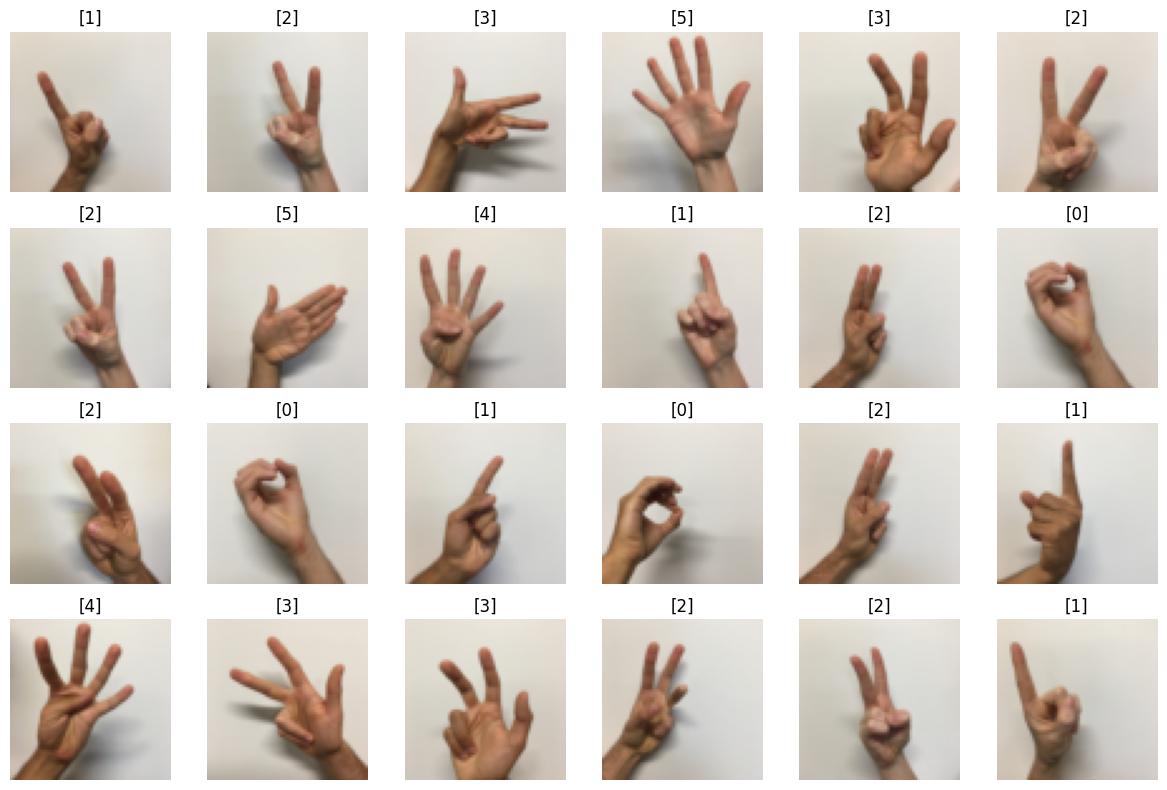

In [4]:
plt.figure(figsize= (12,8))
display_samples_in_grid(train_data, n_rows=4, n_cols=6, y= train_labels.T)
plt.tight_layout(h_pad=1, w_pad=1)

## Solution 
<hr/>

In [5]:
from tensorflow.keras import layers, models

In [6]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(classes), activation='softmax')
])

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# Load the dataset
train_data, train_labels, test_data, test_labels, classes = load_dataset()

# Preprocess the data (normalize pixel values)
train_data = train_data / 255
test_data = test_data / 255

In [9]:
# Reshape the labels array to have the correct shape
train_labels = train_labels.T
test_labels = test_labels.T

print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)


(1080, 64, 64, 3)
(1080, 1)
(120, 64, 64, 3)
(120, 1)


In [10]:
history = model.fit(train_data, train_labels, epochs=20, batch_size=32, validation_data=(test_data, test_labels))

Epoch 1/20
34/34 [==============================] - 4s 85ms/step - loss: 1.7729 - accuracy: 0.2398 - val_loss: 1.6311 - val_accuracy: 0.4583
Epoch 2/20
34/34 [==============================] - 3s 74ms/step - loss: 1.3787 - accuracy: 0.4611 - val_loss: 1.1897 - val_accuracy: 0.5667
Epoch 3/20
34/34 [==============================] - 3s 87ms/step - loss: 0.9711 - accuracy: 0.6370 - val_loss: 0.8482 - val_accuracy: 0.7083
Epoch 4/20
34/34 [==============================] - 3s 95ms/step - loss: 0.7234 - accuracy: 0.7454 - val_loss: 0.6880 - val_accuracy: 0.7667
Epoch 5/20
34/34 [==============================] - 4s 108ms/step - loss: 0.5582 - accuracy: 0.8194 - val_loss: 0.4976 - val_accuracy: 0.7917
Epoch 6/20
34/34 [==============================] - 4s 125ms/step - loss: 0.4312 - accuracy: 0.8509 - val_loss: 0.4504 - val_accuracy: 0.8333
Epoch 7/20
34/34 [==============================] - 3s 92ms/step - loss: 0.3416 - accuracy: 0.8981 - val_loss: 0.3585 - val_accuracy: 0.8667
Epoch 8/20


In [11]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print("Test Accuracy:", test_accuracy)

4/4 [==============================] - 0s 13ms/step - loss: 0.3381 - accuracy: 0.9250
Test Accuracy: 0.925000011920929


### Try different hidden_layer 

In [12]:
# Define a function to create models with different hidden layers
def create_model(num_hidden_layers):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    
    for _ in range(num_hidden_layers):
        model.add(layers.Conv2D(64, (3, 3), activation='relu'))
        model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(len(classes), activation='softmax'))
    
    return model


num_hidden_layers_list = [1, 2, 3]
histories = []

# Train and evaluate models with different numbers of hidden layers
for num_hidden_layers in num_hidden_layers_list:
    print(f"\nTraining model with {num_hidden_layers} hidden layer(s):")
    model = create_model(num_hidden_layers)
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_data, train_labels, epochs=20, batch_size=32, validation_data=(test_data, test_labels))
    histories.append(history)
    
    test_loss, test_accuracy = model.evaluate(test_data, test_labels)
    print("Test Accuracy:", test_accuracy)



Training model with 1 hidden layer(s):
Epoch 1/20
34/34 [==============================] - 2s 52ms/step - loss: 1.7565 - accuracy: 0.3176 - val_loss: 1.4853 - val_accuracy: 0.4750
Epoch 2/20
34/34 [==============================] - 2s 45ms/step - loss: 1.1676 - accuracy: 0.5620 - val_loss: 0.9232 - val_accuracy: 0.7000
Epoch 3/20
34/34 [==============================] - 2s 45ms/step - loss: 0.7699 - accuracy: 0.7444 - val_loss: 0.7046 - val_accuracy: 0.7500
Epoch 4/20
34/34 [==============================] - 2s 51ms/step - loss: 0.5185 - accuracy: 0.8343 - val_loss: 0.5286 - val_accuracy: 0.8500
Epoch 5/20
34/34 [==============================] - 2s 45ms/step - loss: 0.3600 - accuracy: 0.8991 - val_loss: 0.4605 - val_accuracy: 0.8500
Epoch 6/20
34/34 [==============================] - 2s 52ms/step - loss: 0.2892 - accuracy: 0.9102 - val_loss: 0.3763 - val_accuracy: 0.8917
Epoch 7/20
34/34 [==============================] - 2s 49ms/step - loss: 0.2196 - accuracy: 0.9361 - val_loss: 0.4

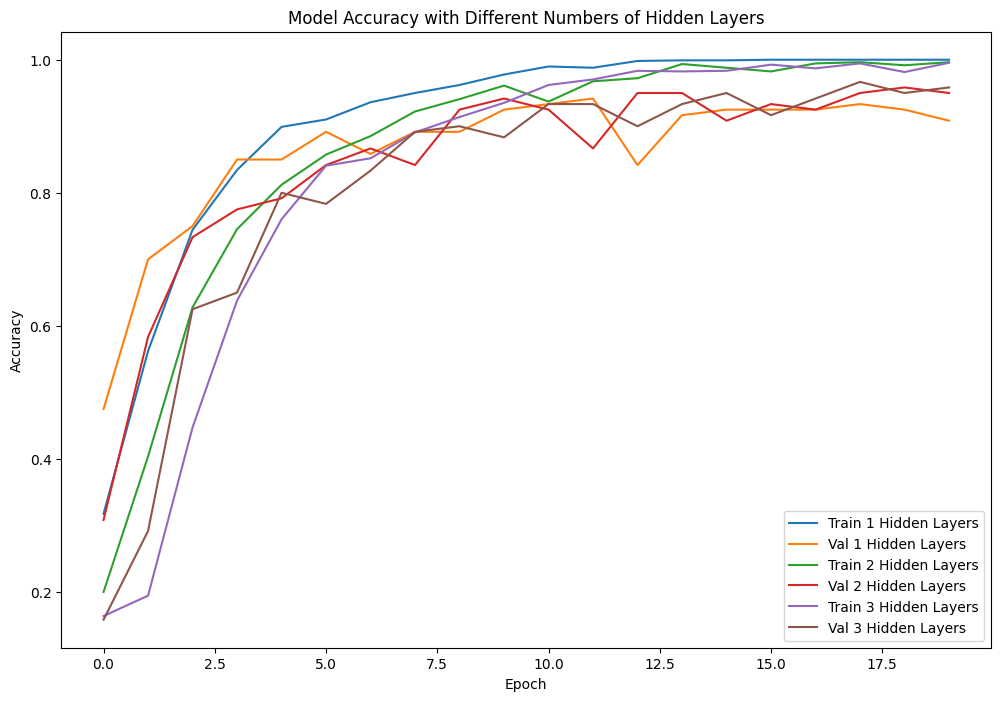

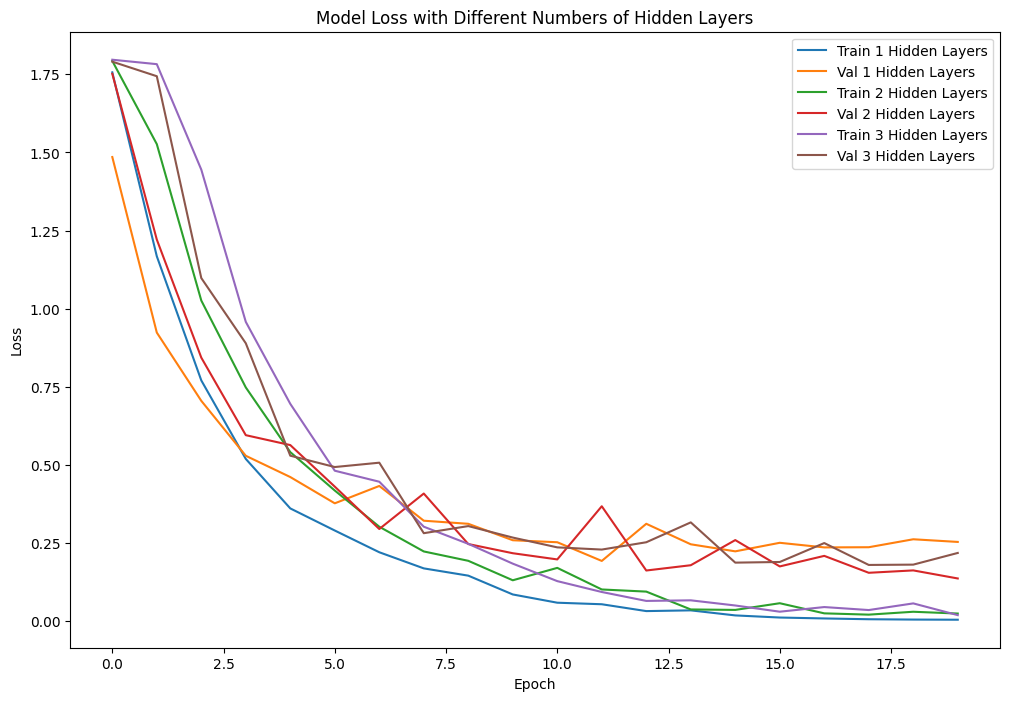

In [13]:
plt.figure(figsize=(12, 8))

for i, num_hidden_layers in enumerate(num_hidden_layers_list):
    plt.plot(histories[i].history['accuracy'], label=f'Train {num_hidden_layers} Hidden Layers')
    plt.plot(histories[i].history['val_accuracy'], label=f'Val {num_hidden_layers} Hidden Layers')

plt.title('Model Accuracy with Different Numbers of Hidden Layers')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.figure(figsize=(12, 8))

for i, num_hidden_layers in enumerate(num_hidden_layers_list):
    plt.plot(histories[i].history['loss'], label=f'Train {num_hidden_layers} Hidden Layers')
    plt.plot(histories[i].history['val_loss'], label=f'Val {num_hidden_layers} Hidden Layers')

plt.title('Model Loss with Different Numbers of Hidden Layers')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


#### Conclusion :
- Increasing the number of hidden layers generally allows the model to learn more complex representations, which can lead to better performance, as seen in the increasing trend of validation accuracy.
- However, adding too many hidden layers can also increase the risk of overfitting, as seen in the model with 3 hidden layers, where the validation loss starts to increase slightly towards the end.
- The model with 2 hidden layers appears to strike a good balance between complexity and generalization, as it achieves the highest validation accuracy without significant signs of overfitting. <br/><br/><br/>
In conclusion, when choosing the number of hidden layers, it's essential to strike a balance between model complexity and generalization to achieve optimal performance.

### TANH SIGMOID


In [14]:
# Define a function to create models with different activation functions
def create_model(activation_func):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation=activation_func, input_shape=(64, 64, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation=activation_func))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation=activation_func))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation=activation_func))
    model.add(layers.Dense(len(classes), activation='softmax'))
    
    return model


activation_functions = ['tanh', 'sigmoid']
histories = []

# Train and evaluate models with different activation functions
for activation_func in activation_functions:
    print(f"\nTraining model with {activation_func} activation:")
    model = create_model(activation_func)
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_data, train_labels, epochs=20, batch_size=32, validation_data=(test_data, test_labels))
    histories.append(history)
    
    test_loss, test_accuracy = model.evaluate(test_data, test_labels)
    print("Test Accuracy:", test_accuracy)



Training model with tanh activation:
Epoch 1/20
34/34 [==============================] - 3s 67ms/step - loss: 1.9501 - accuracy: 0.2926 - val_loss: 1.2364 - val_accuracy: 0.5583
Epoch 2/20
34/34 [==============================] - 2s 51ms/step - loss: 1.0710 - accuracy: 0.6185 - val_loss: 0.8635 - val_accuracy: 0.6417
Epoch 3/20
34/34 [==============================] - 2s 70ms/step - loss: 0.7545 - accuracy: 0.7389 - val_loss: 0.6212 - val_accuracy: 0.7750
Epoch 4/20
34/34 [==============================] - 2s 63ms/step - loss: 0.5770 - accuracy: 0.8065 - val_loss: 0.4873 - val_accuracy: 0.8333
Epoch 5/20
34/34 [==============================] - 3s 75ms/step - loss: 0.5065 - accuracy: 0.8296 - val_loss: 0.4628 - val_accuracy: 0.8083
Epoch 6/20
34/34 [==============================] - 2s 66ms/step - loss: 0.3371 - accuracy: 0.8926 - val_loss: 0.3957 - val_accuracy: 0.8500
Epoch 7/20
34/34 [==============================] - 2s 71ms/step - loss: 0.2707 - accuracy: 0.9157 - val_loss: 0.351

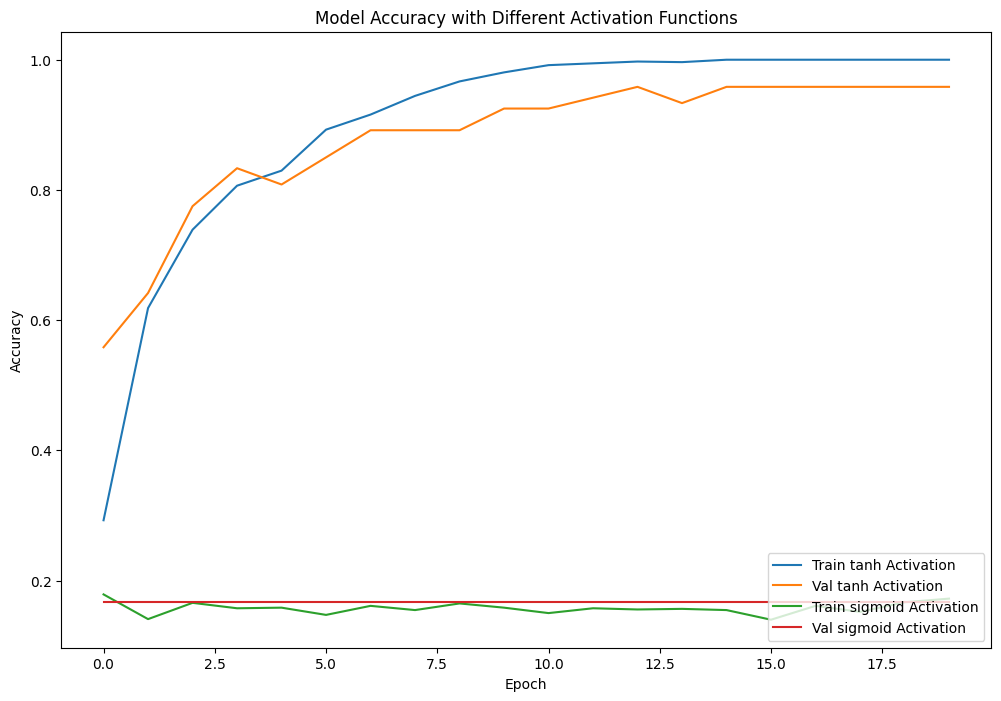

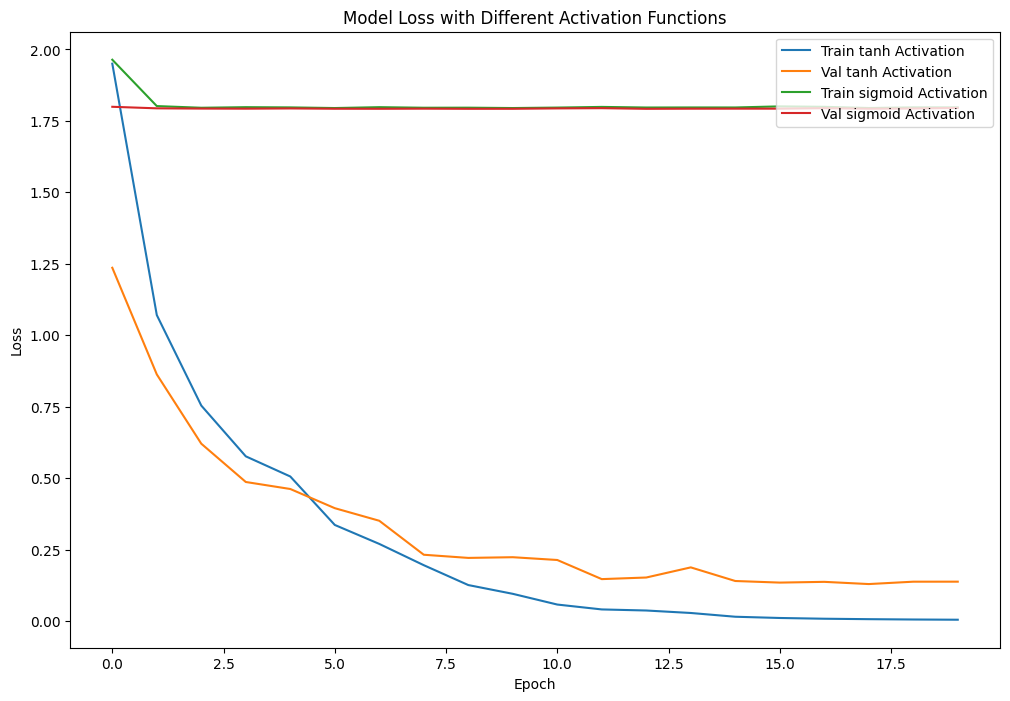

In [15]:
# Plotting
plt.figure(figsize=(12, 8))

for i, activation_func in enumerate(activation_functions):
    plt.plot(histories[i].history['accuracy'], label=f'Train {activation_func} Activation')
    plt.plot(histories[i].history['val_accuracy'], label=f'Val {activation_func} Activation')

plt.title('Model Accuracy with Different Activation Functions')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.figure(figsize=(12, 8))

for i, activation_func in enumerate(activation_functions):
    plt.plot(histories[i].history['loss'], label=f'Train {activation_func} Activation')
    plt.plot(histories[i].history['val_loss'], label=f'Val {activation_func} Activation')

plt.title('Model Loss with Different Activation Functions')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

#### Conclusion :

In conclusion, when choosing activation functions, it's crucial to consider their impact on the model's learning capacity. In this case, tanh activation proved to be a more suitable choice, leading to better learning outcomes compared to sigmoid activation.

### Droprate


In [16]:
# Define a function to create models with different dropout ratios
def create_model(dropout_rate):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(len(classes), activation='softmax'))
    
    return model

dropout_rates = [0.1, 0.3, 0.5]
histories = []

# Train and evaluate models with different dropout ratios
for dropout_rate in dropout_rates:
    print(f"\nTraining model with dropout rate {dropout_rate}:")
    model = create_model(dropout_rate)
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_data, train_labels, epochs=20, batch_size=32, validation_data=(test_data, test_labels))
    histories.append(history)
    
    test_loss, test_accuracy = model.evaluate(test_data, test_labels)
    print("Test Accuracy:", test_accuracy)


Training model with dropout rate 0.1:
Epoch 1/20
34/34 [==============================] - 3s 68ms/step - loss: 1.7903 - accuracy: 0.1926 - val_loss: 1.7510 - val_accuracy: 0.1667
Epoch 2/20
34/34 [==============================] - 2s 66ms/step - loss: 1.4876 - accuracy: 0.3926 - val_loss: 1.2579 - val_accuracy: 0.5667
Epoch 3/20
34/34 [==============================] - 3s 85ms/step - loss: 1.0397 - accuracy: 0.6204 - val_loss: 0.9438 - val_accuracy: 0.6750
Epoch 4/20
34/34 [==============================] - 3s 83ms/step - loss: 0.7566 - accuracy: 0.7241 - val_loss: 0.7407 - val_accuracy: 0.7583
Epoch 5/20
34/34 [==============================] - 3s 87ms/step - loss: 0.5837 - accuracy: 0.8000 - val_loss: 0.5187 - val_accuracy: 0.8333
Epoch 6/20
34/34 [==============================] - 2s 69ms/step - loss: 0.4425 - accuracy: 0.8417 - val_loss: 0.3840 - val_accuracy: 0.8833
Epoch 7/20
34/34 [==============================] - 2s 74ms/step - loss: 0.3829 - accuracy: 0.8667 - val_loss: 0.40

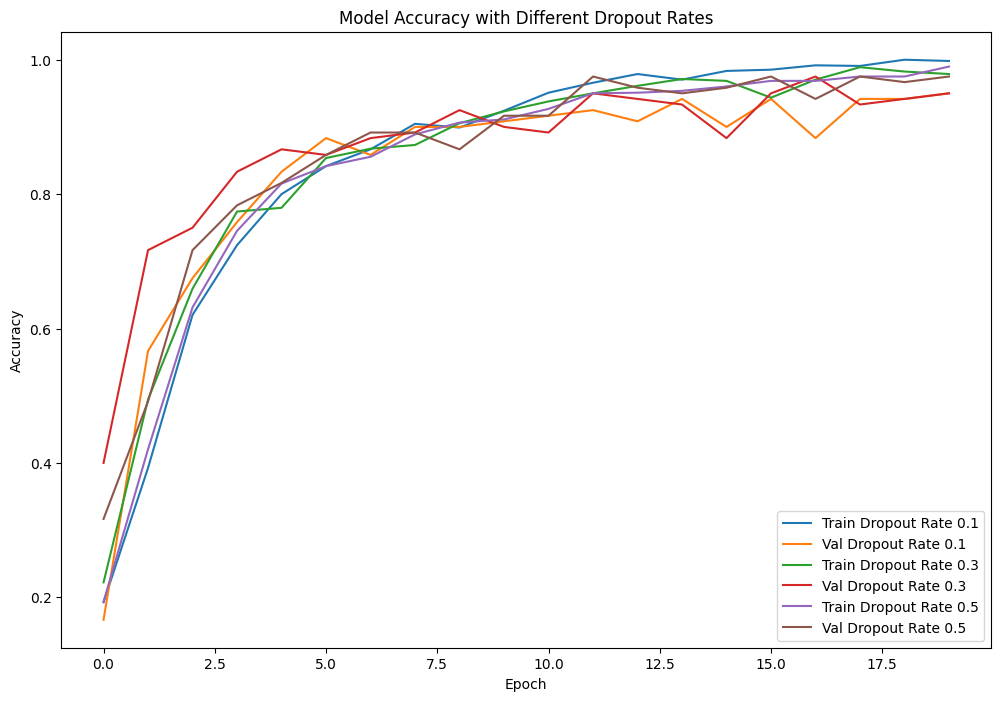

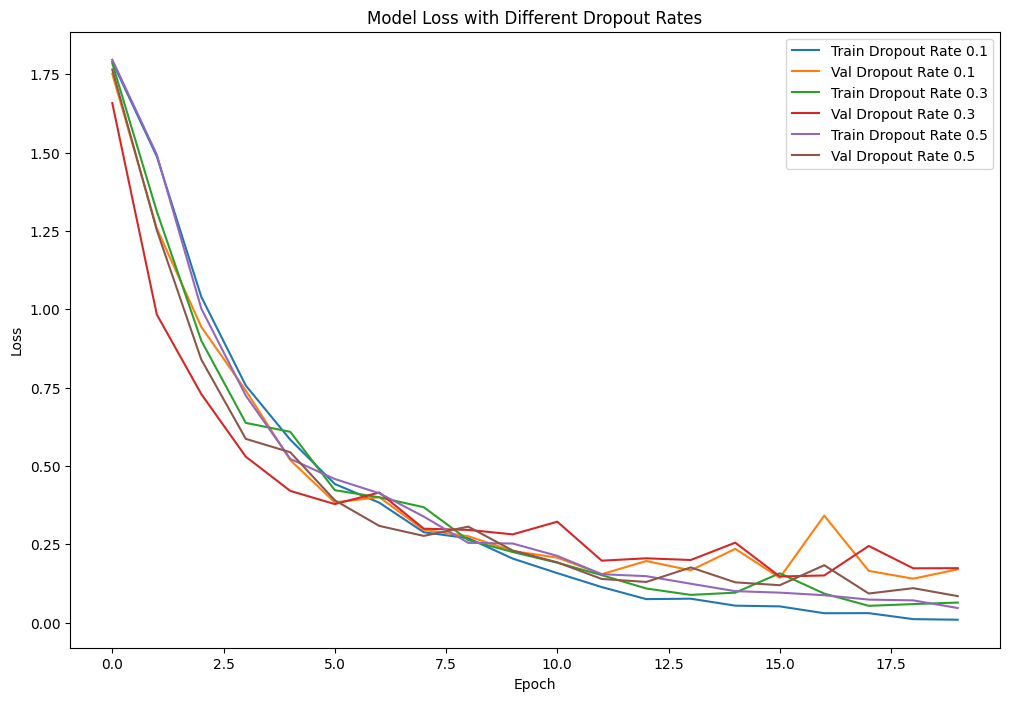

In [17]:
# Plotting
plt.figure(figsize=(12, 8))

for i, dropout_rate in enumerate(dropout_rates):
    plt.plot(histories[i].history['accuracy'], label=f'Train Dropout Rate {dropout_rate}')
    plt.plot(histories[i].history['val_accuracy'], label=f'Val Dropout Rate {dropout_rate}')

plt.title('Model Accuracy with Different Dropout Rates')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.figure(figsize=(12, 8))

for i, dropout_rate in enumerate(dropout_rates):
    plt.plot(histories[i].history['loss'], label=f'Train Dropout Rate {dropout_rate}')
    plt.plot(histories[i].history['val_loss'], label=f'Val Dropout Rate {dropout_rate}')

plt.title('Model Loss with Different Dropout Rates')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


#### Conclusion :
- All models show effective learning, with validation accuracies ranging from 95% to 97.5%.
- Using dropout regularization helps prevent overfitting, as seen in the consistent decrease of validation loss alongside training loss.
- The model with a dropout rate of 0.5 performs slightly better than the others, achieving the highest validation accuracy.
<br/><br/><br/>
In conclusion, incorporating dropout regularization with an appropriate rate (0.3 to 0.5 in this case) helps improve the generalization ability of the model, preventing overfitting and leading to better performance on unseen data.